# Clustering de documents

## Imports

In [1]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [2]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
    ssl._create_default_https_context = _create_unverified_https_context
except:
    pass

nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/azossieteresafabiola/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/azossieteresafabiola/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
import nltk

nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/azossieteresafabiola/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/azossieteresafabiola/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
data_path = "./data/txt/"

In [5]:
data_path = "../data/txt/"

## Choisir une décennie

In [6]:
DECADE = '1920'

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [7]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [8]:
# Exemple de fichiers
files[:500]

['KB_JB838_1920-01-13_01-00005.txt',
 'KB_JB838_1920-01-18_01-00014.txt',
 'KB_JB838_1920-02-04_01-00001.txt',
 'KB_JB838_1920-02-04_01-00002.txt',
 'KB_JB838_1920-02-06_01-00004.txt',
 'KB_JB838_1920-02-07_01-00006.txt',
 'KB_JB838_1920-02-08_01-00005.txt',
 'KB_JB838_1920-02-08_01-00010.txt',
 'KB_JB838_1920-02-10_01-00002.txt',
 'KB_JB838_1920-02-27_01-00011.txt',
 'KB_JB838_1920-02-29_01-00005.txt',
 'KB_JB838_1920-03-01_01-00004.txt',
 'KB_JB838_1920-03-04_01-00008.txt',
 'KB_JB838_1920-03-08_01-00001.txt',
 'KB_JB838_1920-03-11_01-00004.txt',
 'KB_JB838_1920-03-17_01-00001.txt',
 'KB_JB838_1920-03-19_01-00001.txt',
 'KB_JB838_1920-03-19_01-00003.txt',
 'KB_JB838_1920-03-19_01-00004.txt',
 'KB_JB838_1920-03-22_01-00002.txt',
 'KB_JB838_1920-03-23_01-00004.txt',
 'KB_JB838_1920-03-25_01-00002.txt',
 'KB_JB838_1920-03-29_01-00003.txt',
 'KB_JB838_1920-04-08_01-00002.txt',
 'KB_JB838_1920-04-13_01-00008.txt',
 'KB_JB838_1920-04-14_01-00007.txt',
 'KB_JB838_1920-04-17_01-00007.txt',
 

In [9]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [10]:
# Exemple de textes
texts[0][:400]

'LE SOIR « Lm Miniafci» Wnrt Itft mmm aoi|aét (|M W TêtoaMHit qu’il* >f<ww>p*‘ jnrntUi chaud** éekw* p**, U* foulard* élégant*, 1* boaiMtori* ooafovUU* d* BOULANGER afrnUmk à la perfection d* la te*»»e. CD. BOULANGER & FUS MAITRES-CHEMISIERS 70, Rie du Lombard, BRUXELLES Tél. : B. 121.32 VA L. EN TA . tiïa. usage constant dans B Ha HOPITAUX ANGLAIS D U BARRV, Bf ION DRES « Hue Duret, 8, Péris, le 1'

## Vectoriser les documents à l'aide de TF-IDF

In [11]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [12]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [13]:
tfidf_vectors = vectorizer.fit_transform(texts)

/Users/azossieteresafabiola/Tp3/tac/tac_venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [14]:
# Détail de la matrice
tfidf_vectors

<1000x3982 sparse matrix of type '<class 'numpy.float64'>'
	with 811417 stored elements in Compressed Sparse Row format>

### Imprimer le vecteur tf-IDF du premier document

In [15]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

louer         0.554273
ami           0.123930
jardin        0.120791
env           0.119130
étage         0.108724
                ...   
déclaré       0.000000
découvert     0.000000
découverte    0.000000
décès         0.000000
♦             0.000000
Length: 3982, dtype: float64

## Comprendre les vecteurs et leurs "distances"

In [16]:
cosine([1, 2, 3], [1, 2, 3])

0

In [17]:
cosine([1, 2, 3], [1, 2, 2])

0.02004211298777725

In [18]:
cosine([1, 2, 3], [2, 2, 2])

0.07417990022744858

### Tests sur nos documents

In [19]:
tfidf_array = tfidf_vectors.toarray()

In [20]:
# Vecteur du document 0
tfidf_array[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [21]:
# Vecteur du document 1
tfidf_array[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [22]:
cosine(tfidf_array[0], tfidf_array[1])

0.8926619422735202

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [23]:
N_CLUSTERS = 5

### Instancier le modèle K-Means et ses arguments

In [24]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [25]:
clusters = km_model.fit_predict(tfidf_vectors)

In [26]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [27]:
pprint(dict(clustering))

{0: ['KB_JB838_1920-02-06_01-00004.txt',
     'KB_JB838_1920-02-27_01-00011.txt',
     'KB_JB838_1920-03-04_01-00008.txt',
     'KB_JB838_1920-03-11_01-00004.txt',
     'KB_JB838_1920-03-19_01-00004.txt',
     'KB_JB838_1920-03-23_01-00004.txt',
     'KB_JB838_1920-04-13_01-00008.txt',
     'KB_JB838_1920-04-23_01-00004.txt',
     'KB_JB838_1920-05-10_01-00006.txt',
     'KB_JB838_1920-05-26_01-00004.txt',
     'KB_JB838_1920-05-28_01-00008.txt',
     'KB_JB838_1920-06-01_01-00008.txt',
     'KB_JB838_1920-06-07_01-00006.txt',
     'KB_JB838_1920-06-09_01-00004.txt',
     'KB_JB838_1920-06-24_01-00004.txt',
     'KB_JB838_1920-07-15_01-00006.txt',
     'KB_JB838_1920-08-18_01-00008.txt',
     'KB_JB838_1920-08-20_01-00008.txt',
     'KB_JB838_1920-10-16_01-00008.txt',
     'KB_JB838_1920-10-26_01-00007.txt',
     'KB_JB838_1920-10-27_01-00004.txt',
     'KB_JB838_1920-11-07_01-00012.txt',
     'KB_JB838_1920-11-15_01-00007.txt',
     'KB_JB838_1920-12-19_01-00014.txt',
     'KB_JB838_1

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [28]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [29]:
reduced_vectors[:10]

array([[ 0.18320694, -0.24440518],
       [-0.10203273, -0.02854452],
       [-0.31081116,  0.19115845],
       [-0.31197683,  0.17964744],
       [-0.17986557, -0.03288066],
       [ 0.61165772,  0.36934973],
       [ 0.12138147, -0.369937  ],
       [-0.11887868, -0.15528845],
       [-0.29834906,  0.16660672],
       [ 0.0246944 , -0.25078618]])

### Générer le plot

In [30]:
import numpy as np
from collections import Counter
import re

def simple_tokens(text):
    return re.findall(r"\b[a-zA-Zéèêàùûôç]+\b", text.lower())

k = len(set(clusters))

for c in range(k):
    idx = np.where(clusters == c)[0]
    print(f"\n=== CLUSTER {c} ===")
    print(f"{len(idx)} documents")

    # Montrer quelques fichiers
    print("Exemples :", [files[i] for i in idx[:5]])

    # Mots les plus fréquents
    all_words = []
    for i in idx:
        all_words.extend(simple_tokens(texts[i]))

    top_words = Counter(all_words).most_common(20)
    print("Top 20 mots :", [w for w, _ in top_words])


=== CLUSTER 0 ===
233 documents
Exemples : ['KB_JB838_1920-02-06_01-00004.txt', 'KB_JB838_1920-02-27_01-00011.txt', 'KB_JB838_1920-03-04_01-00008.txt', 'KB_JB838_1920-03-11_01-00004.txt', 'KB_JB838_1920-03-19_01-00004.txt']
Top 20 mots : ['de', 'a', 'et', 'd', 'l', 'i', 'r', 'la', 'à', 'fr', 's', 'c', 'rue', 'p', 't', 'en', 'le', 'b', 'o', 'j']

=== CLUSTER 1 ===
169 documents
Exemples : ['KB_JB838_1920-02-07_01-00006.txt', 'KB_JB838_1920-04-14_01-00007.txt', 'KB_JB838_1920-04-17_01-00007.txt', 'KB_JB838_1920-05-17_01-00005.txt', 'KB_JB838_1920-05-26_01-00006.txt']
Top 20 mots : ['de', 'a', 'et', 'dem', 'on', 'r', 'rue', 'd', 'l', 's', 'à', 'i', 'la', 'pour', 'b', 't', 'fr', 'h', 'ou', 'p']

=== CLUSTER 2 ===
438 documents
Exemples : ['KB_JB838_1920-01-18_01-00014.txt', 'KB_JB838_1920-02-04_01-00001.txt', 'KB_JB838_1920-02-04_01-00002.txt', 'KB_JB838_1920-02-10_01-00002.txt', 'KB_JB838_1920-03-08_01-00001.txt']
Top 20 mots : ['de', 'la', 'et', 'le', 'l', 'à', 'les', 'a', 'd', 'des', '

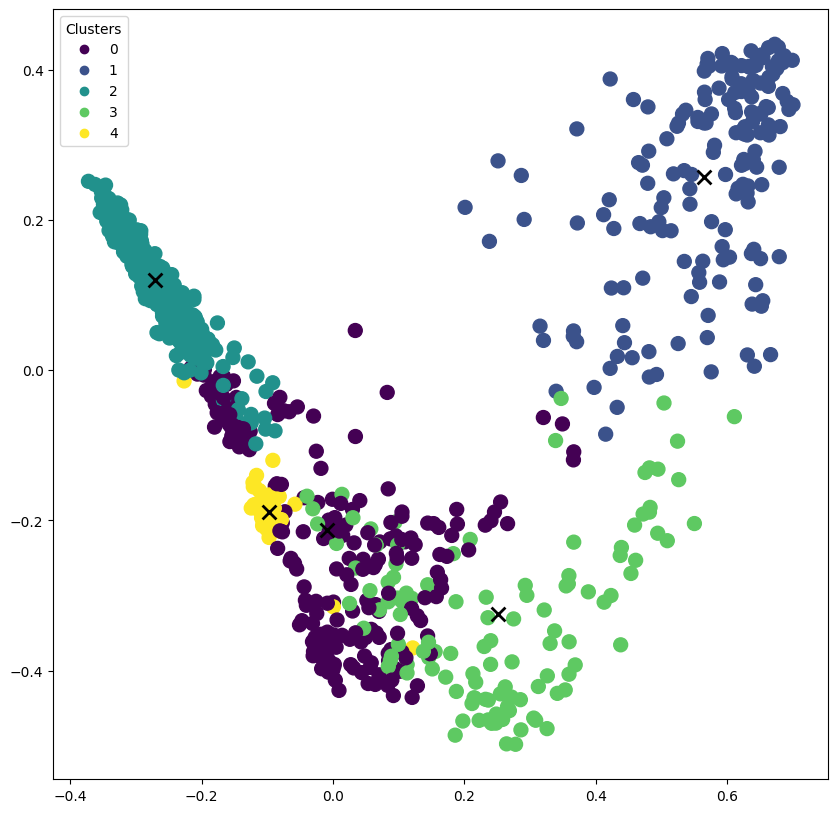

In [31]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")